<a href="https://colab.research.google.com/github/Archanamayacharya/data-science-salary-analysis/blob/main/data_scientist_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

In [13]:
#Reading dataset
data = pd.read_csv("/content/Data Science Job Salaries.csv")

In [ ]:
data

In [14]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data.shape

In [15]:
#basic statistic
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [16]:
#drop unnecessary column
data.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
#all columns
columns=list(data)
columns

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [18]:
#checking null values
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [19]:
(data[columns[0:8]]==0).sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0


In [20]:
#checking duplicates
duplicate_count=data.duplicated().sum()
duplicate_count

np.int64(42)

In [21]:
#removing duplicates
data=data.drop_duplicates()

In [22]:
data.shape

(565, 11)

In [23]:
#covert categorical columns to category dtype
categorical_cols=['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
for col in categorical_cols:
  data[col]=data[col].astype('category')

In [24]:
data.dtypes

,0
work_year,int64
experience_level,category
employment_type,category
job_title,category
salary,int64
salary_currency,category
salary_in_usd,int64
employee_residence,category
remote_ratio,int64
company_location,category


In [25]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


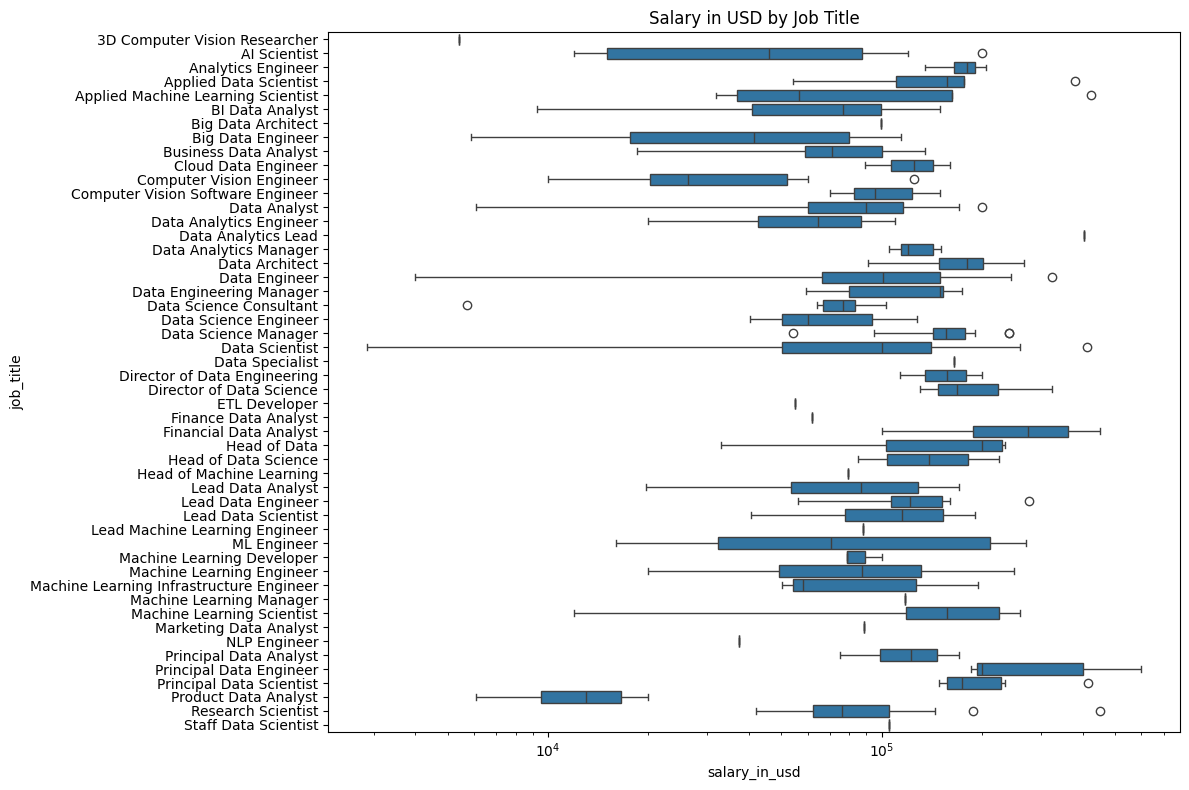

In [27]:
#looking for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='salary_in_usd', y='job_title')
plt.title("Salary in USD by Job Title")
plt.xscale("log")  # because salaries have wide range
plt.tight_layout()
plt.show()


In [28]:
#looking for data scientist salary
data_ds=data[data['job_title']=='Data Scientist']

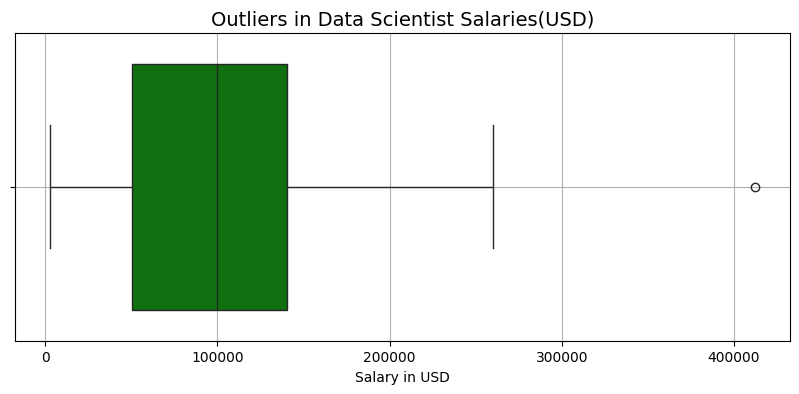

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data_ds['salary_in_usd'],color='green')
plt.title('Outliers in Data Scientist Salaries(USD)',fontsize=14)
plt.xlabel('Salary in USD')
plt.grid(True)
plt.show()

In [30]:
import pandas as pd
import numpy as np

# ----- 0. Encode company size -----
size_map = {'S': 1, 'M': 2, 'L': 3}
data['company_size_encoded'] = data['company_size'].map(size_map).astype(int)

# ----- 1. Encode experience level (ordinal) -----
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
data['experience_level_encoded'] = data['experience_level'].map(experience_map).astype(int)

# ----- 2. Encode employment type (one-hot) -----
if 'employment_type' in data.columns:
    data = pd.get_dummies(data, columns=['employment_type'], prefix='emp')

# ----- 3. Normalize job titles -----
def simplify_job_title(title):
    title = title.lower()
    if 'scientist' in title:
        return 'Scientist'
    elif 'engineer' in title:
        return 'Engineer'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'manager' in title:
        return 'Manager'
    else:
        return 'Other'

data['job_category'] = data['job_title'].apply(simplify_job_title)
data = pd.get_dummies(data, columns=['job_category'], prefix='job')

# ----- 4. Location features -----
data['employee_residence'] = data['employee_residence'].astype(str)
data['company_location'] = data['company_location'].astype(str)

# Same country
data['same_country'] = (data['employee_residence'] == data['company_location']).astype(int)

# Continent mapping
continent_map = {
    'US':'North America','CA':'North America','MX':'North America',
    'GB':'Europe','DE':'Europe','FR':'Europe','ES':'Europe','IT':'Europe',
    'IN':'Asia','CN':'Asia','JP':'Asia','SG':'Asia','AU':'Oceania',
    'BR':'South America','AR':'South America'
}
data['employee_continent'] = data['employee_residence'].map(continent_map).fillna('Other')
data['company_continent'] = data['company_location'].map(continent_map).fillna('Other')
data = pd.get_dummies(data, columns=['employee_continent','company_continent'], prefix=['emp_cont','comp_cont'])

# ----- 5. Remote ratio (categorical) -----
def remote_type(x):
    if x == 0:
        return 'Onsite'
    elif x == 50:
        return 'Hybrid'
    else:
        return 'Remote'

data['remote_type'] = data['remote_ratio'].apply(remote_type)
data = pd.get_dummies(data, columns=['remote_type'], prefix='remote')

# ----- 6. Interaction features -----
data['exp_x_company_size'] = data['experience_level_encoded'] * data['company_size_encoded']
data['remote_x_exp'] = data['remote_ratio'] * data['experience_level_encoded']

# ----- 7. Target variable -----
data['log_salary_usd'] = np.log1p(data['salary_in_usd'])

In [31]:
import os

# Define directory and file path
out_dir = '/mnt/data'
out_file = 'engineered_data.csv'
os.makedirs(out_dir, exist_ok=True)  # Create directory if it doesn't exist

out_path = os.path.join(out_dir, out_file)
data.to_csv(out_path, index=False)

print("Feature engineering complete. Saved to:", out_path)
data.head()


Feature engineering complete. Saved to: /mnt/data/engineered_data.csv


,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,...,comp_cont_North America,comp_cont_Oceania,comp_cont_Other,comp_cont_South America,remote_Hybrid,remote_Onsite,remote_Remote,exp_x_company_size,remote_x_exp,log_salary_usd
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L,...,False,False,False,False,False,True,False,3,0,11.287705
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,...,False,False,False,False,False,True,False,2,0,12.468441
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,...,False,False,False,False,True,False,False,4,100,11.599332
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S,...,False,False,True,False,False,True,False,1,0,9.903538
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L,...,True,False,False,False,True,False,False,6,100,11.918397


In [32]:
data.shape

(565, 40)

In [33]:
from google.colab import files

# Download the file
files.download('/mnt/data/engineered_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

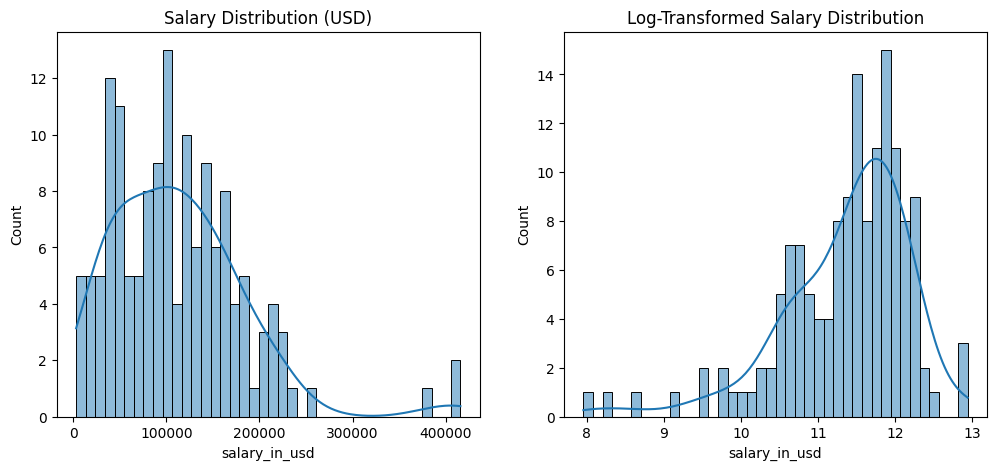

Summary Statistics for Data Scientist Salaries:
count       146.000000
mean     111433.342466
std       72332.807695
min        2859.000000
25%       53453.500000
50%      104196.500000
75%      150000.000000
90%      195000.000000
95%      218825.000000
max      416000.000000
Name: salary_in_usd, dtype: float64


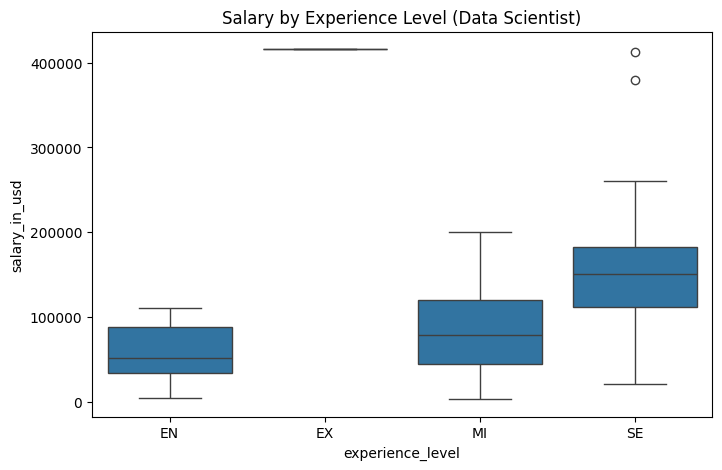

Average Salary by Experience Level:
experience_level
EN     57709.434783
EX    416000.000000
MI     84267.492063
SE    156222.016949
Name: salary_in_usd, dtype: float64
Kruskal-Wallis test: stat=56.74, p=0.0000


/tmp/ipython-input-1798275180.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(ds_data.groupby('experience_level')['salary_in_usd'].mean())
/tmp/ipython-input-1798275180.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['salary_in_usd'].values for name,g in ds_data.groupby('experience_level')]


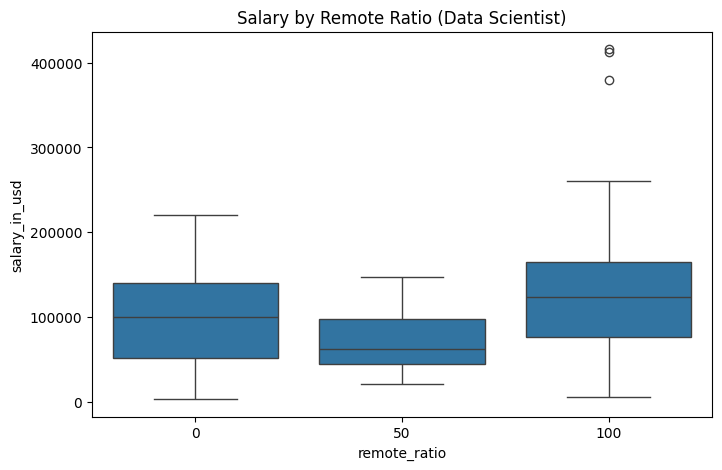

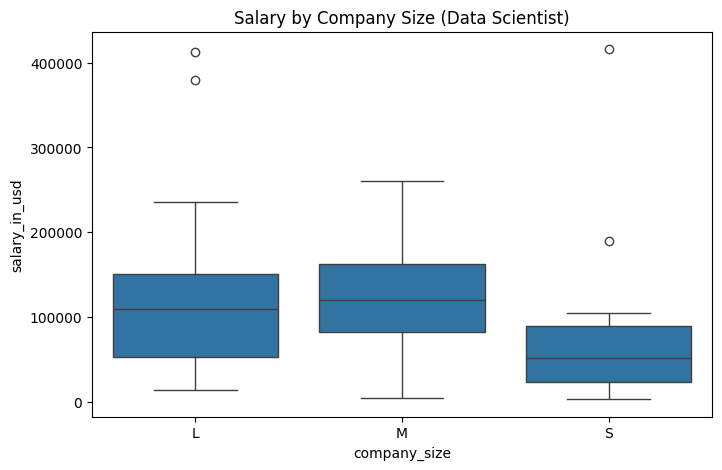

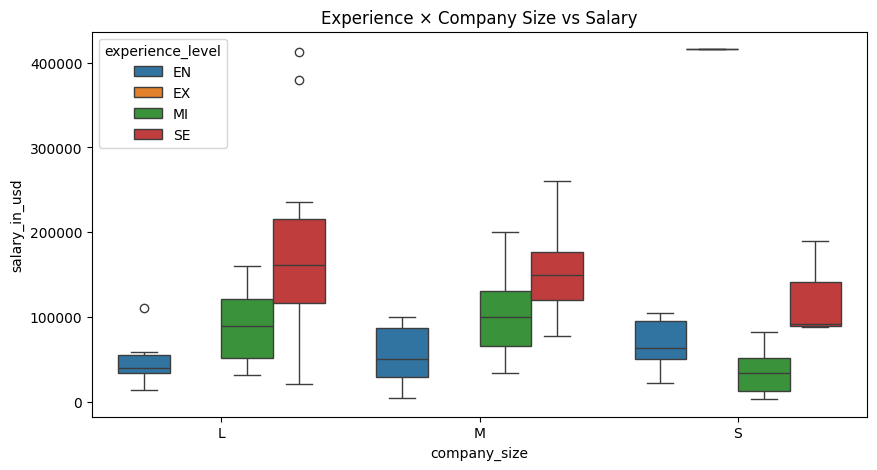

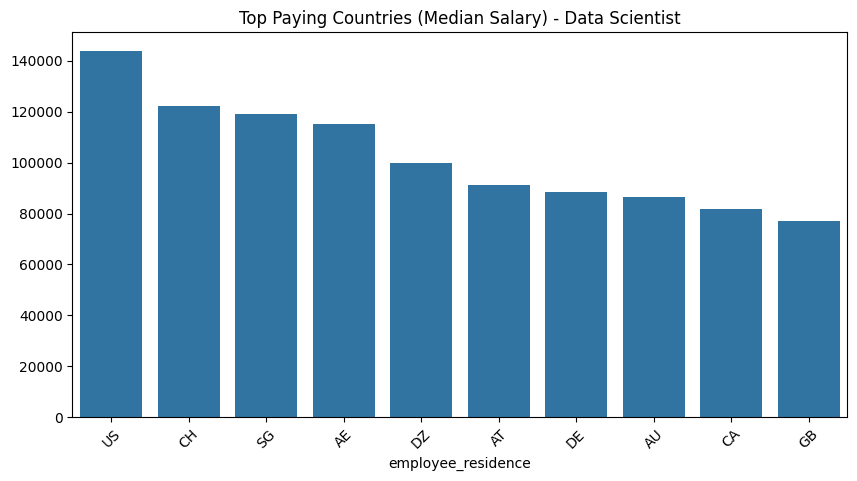

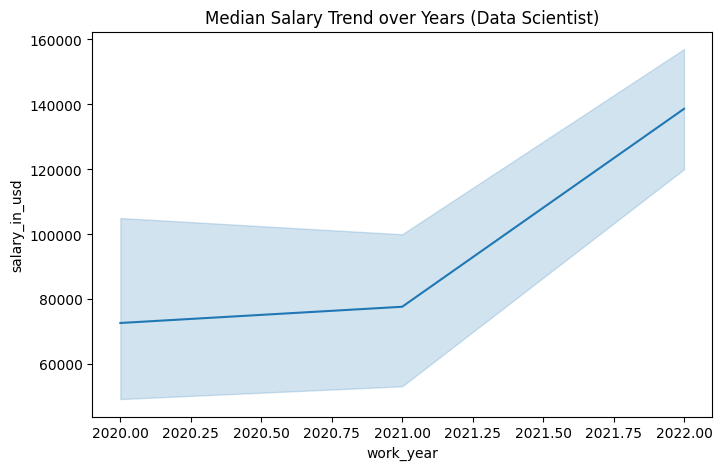

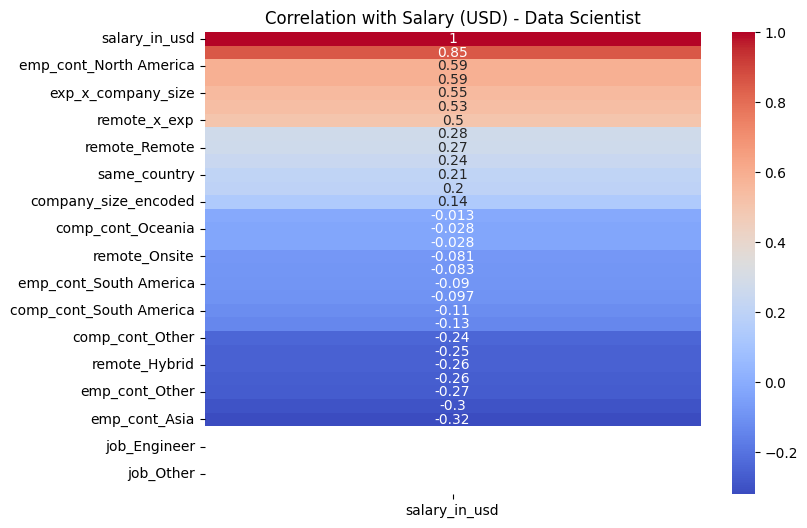

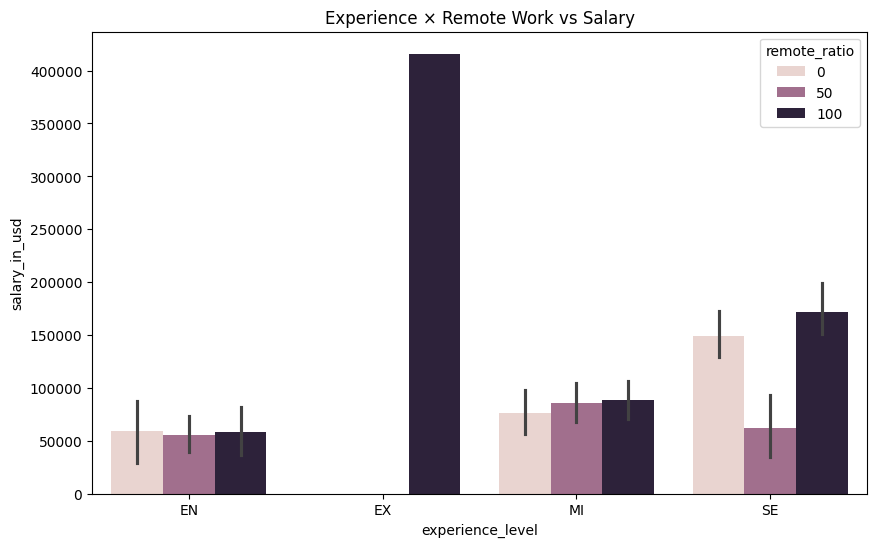

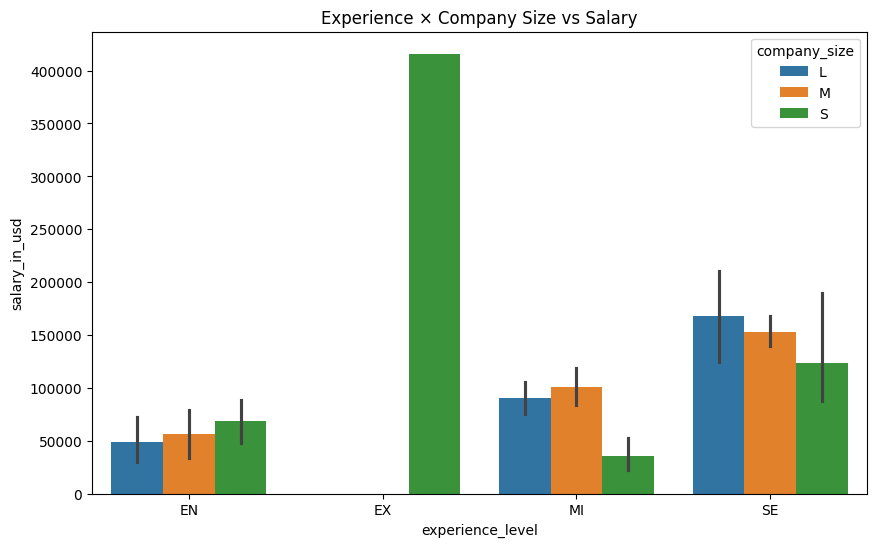

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, f_oneway

# Filter only Data Scientist roles
ds_data = data[data['job_title'].str.contains("Data Scientist", case=False, na=False)].copy()

# ----------------------------
# 1. Salary Distribution
# ----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(ds_data['salary_in_usd'], bins=40, kde=True)
plt.title('Salary Distribution (USD)')

plt.subplot(1,2,2)
sns.histplot(np.log1p(ds_data['salary_in_usd']), bins=40, kde=True)
plt.title('Log-Transformed Salary Distribution')
plt.show()

print("Summary Statistics for Data Scientist Salaries:")
print(ds_data['salary_in_usd'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

# ----------------------------
# 2. Experience Level & Salary
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_data)
plt.title('Salary by Experience Level (Data Scientist)')
plt.show()

print("Average Salary by Experience Level:")
print(ds_data.groupby('experience_level')['salary_in_usd'].mean())

# Statistical test (Kruskal-Wallis)
groups = [g['salary_in_usd'].values for name,g in ds_data.groupby('experience_level')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test: stat={stat:.2f}, p={p:.4f}")

# ----------------------------
# 3. Remote Work & Salary
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_data)
plt.title('Salary by Remote Ratio (Data Scientist)')
plt.show()

# ----------------------------
# 4. Company Size & Salary
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='company_size', y='salary_in_usd', data=ds_data)
plt.title('Salary by Company Size (Data Scientist)')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='company_size', y='salary_in_usd', hue='experience_level', data=ds_data)
plt.title('Experience × Company Size vs Salary')
plt.show()

# ----------------------------
# 5. Geography & Salary
# ----------------------------
# Top countries by median salary
top_countries = ds_data.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title('Top Paying Countries (Median Salary) - Data Scientist')
plt.show()

# ----------------------------
# 6. Yearly Trends
# ----------------------------
plt.figure(figsize=(8,5))
sns.lineplot(x='work_year', y='salary_in_usd', data=ds_data, estimator='median')
plt.title('Median Salary Trend over Years (Data Scientist)')
plt.show()

# ----------------------------
# 7. Correlation Heatmap
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(ds_data.corr(numeric_only=True)[['salary_in_usd']].sort_values(by='salary_in_usd', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Salary (USD) - Data Scientist')
plt.show()

# ----------------------------
# 8. Feature Interactions
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='remote_ratio', data=ds_data)
plt.title('Experience × Remote Work vs Salary')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='company_size', data=ds_data)
plt.title('Experience × Company Size vs Salary')
plt.show()


Categorical columns: ['experience_level', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Numeric columns: ['work_year', 'remote_ratio', 'company_size_encoded', 'experience_level_encoded', 'same_country', 'exp_x_company_size', 'remote_x_exp']
Linear Regression: MAE=33320.64, R2=0.394
Ridge: MAE=30704.45, R2=0.486


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30808435657.682434, tolerance: 240311982.1636549
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE=33146.81, R2=0.390
Decision Tree: MAE=31925.71, R2=0.383
Random Forest: MAE=29397.11, R2=0.447
Gradient Boosting: MAE=28335.81, R2=0.503

Top 10 Most Important Features:
employee_residence_US: 0.3715
exp_x_company_size: 0.1387
experience_level_encoded: 0.0701
job_title_Principal Data Engineer: 0.0465
job_title_Data Analyst: 0.0420
job_title_Applied Machine Learning Scientist: 0.0368
remote_x_exp: 0.0314
job_title_Financial Data Analyst: 0.0306
experience_level_EX: 0.0290
job_title_Data Analytics Lead: 0.0284


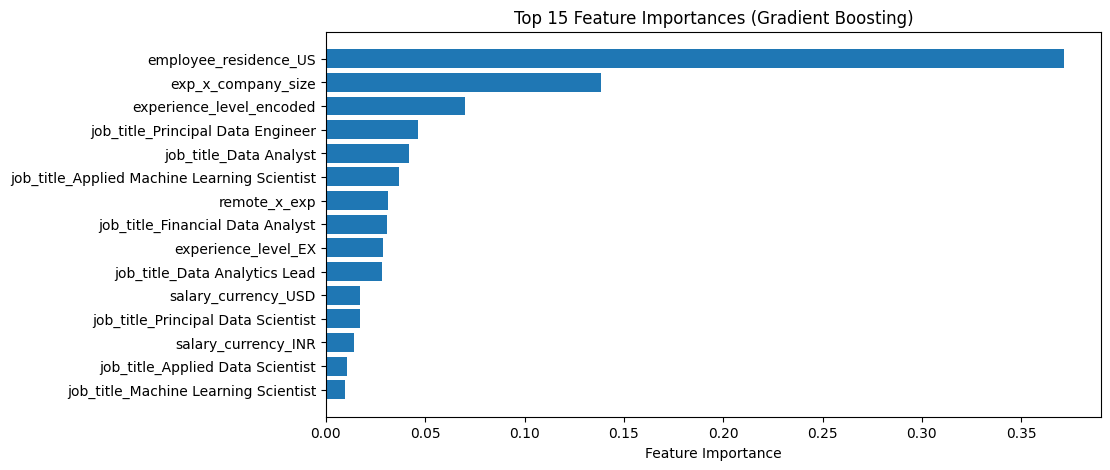

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 1️⃣ Load Data & Fix Features
# -----------------------------
data = pd.read_csv("/content/engineered_data (1).csv")

# Drop target leakage columns
X = data.drop(columns=['salary_in_usd', 'salary', 'log_salary_usd'])
y = data['salary_in_usd']

# Ensure proper dtypes
for col in X.columns:
    if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
        X[col] = X[col].astype(str)

# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# -----------------------------
# 2️⃣ Model Training & Evaluation
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, mae, r2))
    print(f"{name}: MAE={mae:.2f}, R2={r2:.3f}")

# -----------------------------
# 3️⃣ Feature Importance (Gradient Boosting)
# -----------------------------
# Train final Gradient Boosting model
final_model = GradientBoostingRegressor(random_state=42)
final_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])
final_pipe.fit(X_train, y_train)

# Get feature names
feature_names = (
    num_cols +
    list(final_pipe.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(cat_cols))
)

# Extract feature importances
importances = final_pipe.named_steps['model'].feature_importances_
indices = np.argsort(importances)[::-1]

# Print Top 10 Features
print("\nTop 10 Most Important Features:")
for i in indices[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Plot Top 15 Feature Importances
plt.figure(figsize=(10, 5))
plt.barh([feature_names[i] for i in indices[:15]], importances[indices[:15]])
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

1st part

In [36]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Page Setup
# ----------------------------
st.set_page_config(page_title="💰 Salary Dashboard", layout="wide")
st.title("💰 Interactive Salary Trends Dashboard")

# ----------------------------
# Load Dataset
# ----------------------------
@st.cache_data
def load_data():
    return pd.read_csv("engineered_data (1).csv")

df = load_data()

# ----------------------------
# Sidebar Filters
# ----------------------------
st.sidebar.header("Filter Options")
countries = st.sidebar.multiselect(
    "Select Countries",
    df['employee_residence'].unique(),
    default=df['employee_residence'].unique()
)
levels = st.sidebar.multiselect(
    "Select Experience Levels",
    df['experience_level'].unique(),
    default=df['experience_level'].unique()
)

# Apply filters
filtered_df = df[
    (df['employee_residence'].isin(countries)) &
    (df['experience_level'].isin(levels))
]

# ----------------------------
# Main Dashboard
# ----------------------------
st.subheader("Filtered Salary Data")
st.dataframe(filtered_df[['employee_residence', 'experience_level', 'salary_in_usd', 'remote_ratio']])

# ----------------------------
# Bar Chart: Salary by Country
# ----------------------------
st.subheader("💹 Salary by Country")
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    x='employee_residence',
    y='salary_in_usd',
    hue='experience_level',
    data=filtered_df,
    ax=ax,
    errorbar=None
)
plt.xticks(rotation=45)
ax.set_ylabel("Salary (USD)")
ax.set_xlabel("Country")
st.pyplot(fig)

# ----------------------------
# Scatter Plot: Salary vs Remote Ratio
# ----------------------------
st.subheader("📊 Salary vs Remote Work Ratio")
fig2, ax2 = plt.subplots(figsize=(8, 4))
sns.scatterplot(
    x='remote_ratio',
    y='salary_in_usd',
    hue='experience_level',
    data=filtered_df,
    s=100,
    ax=ax2
)
ax2.set_xlabel("Remote Work Ratio (%)")
ax2.set_ylabel("Salary (USD)")
st.pyplot(fig2)

# ----------------------------
# Summary Metrics
# ----------------------------
st.subheader("🔍 Summary Metrics")
col1, col2, col3 = st.columns(3)
col1.metric("Average Salary", f"${filtered_df['salary_in_usd'].mean():,.0f}")
col2.metric("Max Salary", f"${filtered_df['salary_in_usd'].max():,.0f}")
col3.metric("Min Salary", f"${filtered_df['salary_in_usd'].min():,.0f}")

Writing app.py


In [ ]:
from google.colab import files

files.download("app.py")